In [5]:
print("Hello, World!")


Hello, World!


In [7]:
import subprocess
import sys

try:
    # If you have a GPU that supports CUDA
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'tensorflow-gpu'])
except subprocess.CalledProcessError as e:
    print(f"Error: {e}")


Error: Command '['C:\\Users\\ajayk\\AppData\\Local\\Programs\\Python\\Python311\\python.exe', '-m', 'pip', 'install', 'tensorflow-gpu']' returned non-zero exit status 1.


In [8]:
pip install tensorflow



  Using cached wheel-0.44.0-py3-none-any.whl.metadata (2.3 kB)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/385.0 MB 9.6 MB/s eta 0:00:41
   ---------------------------------------- 0.5/385.0 MB 9.6 MB/s eta 0:00:41
   ---------------------------------------- 0.5/385.0 MB 4.3 MB/s eta 0:01:30
   ---------------------------------------- 1.1/385.0 MB 6.0 MB/s eta 0:01:04
   ---------------------------------------- 1.5/385.0 MB 6.5 MB/s eta 0:00:59
   ---------------------------------------- 1.9/385.0 MB 6.7 MB/s eta 0:00:58
   ---------------------------------------- 2.0/385.0 MB 6.1 MB/s eta 0:01:03
   ---------------------------------------- 2.1/385.0 MB 6.0 MB/s eta 0:01:04
   ---------------------------------------- 2.1/385.0 MB 6.0 MB/s eta 0:01:04
   ---------------


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import (
    Dense,
    Input,
    Flatten,
    Reshape,
    LeakyReLU as LR,
    Activation,
    Dropout,
)
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display  # If using IPython, Colab or Jupyter
import numpy as np


In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


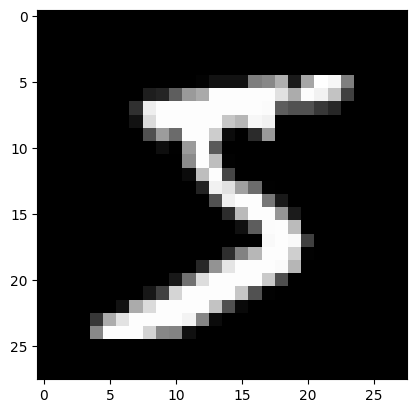

In [12]:
# Plot image data from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()


In [13]:
LATENT_SIZE = 32

In [14]:
encoder = Sequential([
Flatten(input_shape = (28, 28)),
Dense(512),
LR(),
Dropout(0.5),
Dense(256),
LR(),
Dropout(0.5),
Dense(128),
LR(),
Dropout(0.5),
Dense(64),
LR(),
Dropout(0.5),
Dense(LATENT_SIZE),
LR()
])

C:\Users\ajayk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
decoder = Sequential([
    Dense(64, input_shape=(LATENT_SIZE,)),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28)),
])


C:\Users\ajayk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
img = Input(shape = (28, 28))


In [17]:
latent_vector = encoder(img)
output = decoder(latent_vector)

In [18]:
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")

In [19]:
EPOCHS = 60

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


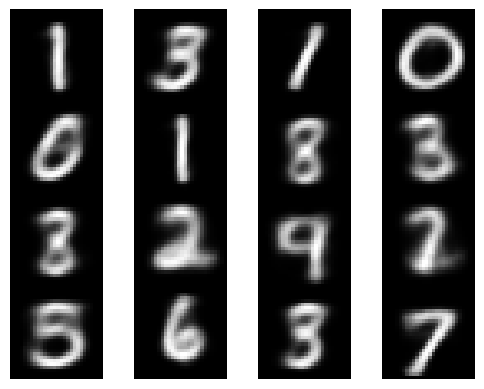

----------- EPOCH 59 -----------
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.1906


In [20]:
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4)
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    display.clear_output()  # If you imported display from IPython
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap="gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(x_train, x_train)
